In [1]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 导入数据

In [2]:
data_00 = pd.read_csv('data/ma_resp_data_temp.csv')
feature_dict = pd.read_excel('保险案例数据字典.xlsx')
data_01 = data_00.copy()

# 探索数据

In [3]:
data_01.head()
data_01['STATE_NAME'].unique()


,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


array(['CA', 'IN', 'MO', 'CT', 'NY', 'KY', 'GA', 'OH', 'WI', 'NH', 'ME'],
      dtype=object)

In [4]:
feature_dict

,变量名,type,变量说明,备注
0,KBM_INDV_ID,Num,用户ID,无意义特征
1,resp_flag,Num,用户是否购买保险,响应变量，也就是我们的目标变量
2,age,Num,年龄,本产品为针对的65岁以上人群保险
3,GEND,Char,性别,NaN
4,c210mys,Num,学历,0-unknown; 1-初中；2-高中不到；3-高中毕业；4-大学未毕业；\n5-大专；6...
...,...,...,...,...
70,c210wht,Num,白领所占比例,值越大，说明比例越高
71,ilor,Num,所处地区居住年限,值越大，说明居住年限越长
72,tins,Num,该客户被多少个名单包含,NaN
73,pdpe,Num,所在地区处方药计划覆盖的比例,值越大，说明覆盖比例越高


## 处理列标签名异常

表中的字段与数据字典不匹配

判断data_01中的列标签名是否都出现在数据字典的变量名中

In [5]:
data_01.columns
len(data_01.columns)

Index(['KBM_INDV_ID', 'resp_flag', 'GEND', 'CA00', 'CA03', 'CA06', 'CA11',
       'CA16', 'AART', 'ADBT', 'ADEP', 'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN',
       'ADGS', 'AHRL', 'ASKN', 'AVIS', 'BANK', 'COLLEGE', 'FINI', 'INLI',
       'INMEDI', 'INVE', 'IOLP', 'MOBPLUS', 'N2NCY', 'NY8Y9', 'N2N29', 'N3N39',
       'N4N49', 'N5N59', 'N6N64', 'N65P', 'ONLA', 'POEP', 'SGFA', 'SGLL',
       'SGOE', 'SGSE', 'SGTC', 'U18', 'LIVEWELL', 'NOC19', 'NAH19', 'NPH19',
       'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME', 'age', 'c210apvt',
       'c210b200', 'c210blu', 'c210bpvt', 'c210cip', 'c210ebi', 'c210hmi',
       'c210hva', 'c210kses', 'c210mah', 'c210mob', 'c210mys', 'c210pdv',
       'c210pmr', 'c210poo', 'c210psu', 'c210pwc', 'c210wht', 'ilor', 'meda',
       'pdpe', 'tins', 'zhip19'],
      dtype='object')

76

In [6]:
feature_dict.变量名

0     KBM_INDV_ID
1       resp_flag
2             age
3            GEND
4         c210mys
         ...     
70        c210wht
71           ilor
72           tins
73           pdpe
74         zhip19
Name: 变量名, Length: 75, dtype: object

In [7]:
#求补集
np.setxor1d(data_01.columns,feature_dict.变量名) 

array(['N1819', 'N2029', 'N2N29', 'N3039', 'N3N39', 'N4049', 'N4N49',
       'N5059', 'N5N59', 'N6064', 'N6N64', 'NY8Y9', 'meda'], dtype=object)

#数据表列标签
NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64'

#数据字典
'N1819', 'N2029','N3039','N4049', 'N5059','N6064'

meda

In [8]:
# 删掉
data_01['meda'].nunique()

75

替换异常标签

In [9]:
a = ['NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64']
b = ['N1819', 'N2029','N3039','N4049', 'N5059','N6064']
# 要替换的列标签，做成映射字典
dic = dict(zip(a,b))
dic
# 替换异常表头
data_01.columns = [dic.get(col, col) for col in data_01.columns]
data_01.head(1)

{'NY8Y9': 'N1819',
 'N2N29': 'N2029',
 'N3N39': 'N3039',
 'N4N49': 'N4049',
 'N5N59': 'N5059',
 'N6N64': 'N6064'}

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8


## 创建自定义翻译函数

提高探索数据效率，创建自定义翻译函数，通过映射字典的方式，替换DataFrame列标签名为中文

In [10]:
dic = {k:v for k,v in feature_dict[['变量名','变量说明']].values.reshape(-1,2)}
dic
def chinese(x):
    y = x.copy()
    #将输入进来的字段名通过字典映射的方式去对应
    y.columns = [dic.get(col, col) for col in y.columns]
    return y

{'KBM_INDV_ID': '用户ID',
 'resp_flag': '用户是否购买保险',
 'age': '年龄',
 'GEND': '性别',
 'c210mys': '学历',
 'POC19': '是否有小孩',
 'CA00': '小孩是否在0-2岁之间',
 'CA03': '小孩是否在3-5岁之间',
 'CA06': '小孩是否在6-10岁之间',
 'CA11': '小孩是否在11-15岁之间',
 'CA16': '小孩是否在16-18岁之间',
 'NOC19': '家庭小孩个数',
 'NAH19': '家庭成年人个数',
 'NPH19': '家庭成员人数量',
 'U18': '是否有家庭成员小于18岁',
 'N1819': '是否有家庭成员在18-19岁之间',
 'N2029': '是否有家庭成员在20-29岁之间',
 'N3039': '是否有家庭成员在30-39岁之间',
 'N4049': '是否有家庭成员在40-49岁之间',
 'N5059': '是否有家庭成员在50-59岁之间',
 'N6064': '是否有家庭成员在60-64岁之间',
 'N65P': '是否有家庭成员在65岁以上',
 'POEP': '家里是否有老人',
 'AART': '是否有关节炎',
 'ADBT': '是否有糖尿病',
 'ADEP': '是否有抑郁症',
 'AHBP': '是否有高血压',
 'AHCH': '胆固醇含量是否过高',
 'ARES': '是否有呼吸疾病',
 'AHRT': '是否有心脏病',
 'AASN': '是否有过敏性鼻炎',
 'ADGS': '是否有消化不良',
 'AHRL': '是否耳聋',
 'ASKN': '是否有皮肤病',
 'AVIS': '是否视力不好',
 'BANK': '是否有过破产记录',
 'COLLEGE': '是否大学毕业',
 'FINI': '是否用过保险服务',
 'INLI': '是否投资过寿险',
 'INMEDI': '是否购买过医疗险',
 'INVE': '是否有投资',
 'IOLP': '是否网上购买过产品',
 'MOBPLUS': '是否通过快递买过东西',
 'N2NCY': '所处的县的大小',
 'ONLA': '是否上网',
 'S

In [11]:
chinese(data_01).head()

,用户ID,用户是否购买保险,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有关节炎,是否有糖尿病,...,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,meda,所在地区处方药计划覆盖的比例,该客户被多少个名单包含,所处地区的家庭收入排名
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


## 探索用户基本信息

In [12]:
feature_dict.变量名[:5]

0    KBM_INDV_ID
1      resp_flag
2            age
3           GEND
4        c210mys
Name: 变量名, dtype: object

In [13]:
feature_dict.变量名[:5].tolist() #得到列表

['KBM_INDV_ID', 'resp_flag', 'age', 'GEND', 'c210mys']

In [14]:
data_01[feature_dict.变量名[:5]].head()

,KBM_INDV_ID,resp_flag,age,GEND,c210mys
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [15]:
#将0_4列取出来并进行翻译
data0_4 = chinese(data_01[feature_dict.变量名[:5]])
data0_4.head()

,用户ID,用户是否购买保险,年龄,性别,学历
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [16]:
data0_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   用户ID      43666 non-null  int64  
 1   用户是否购买保险  43666 non-null  int64  
 2   年龄        43662 non-null  float64
 3   性别        43666 non-null  object 
 4   学历        43666 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ MB


In [17]:
data0_4.isnull().sum()

用户ID        0
用户是否购买保险    0
年龄          4
性别          0
学历          0
dtype: int64

### 自定义探索特征频率函数

输入一个DataFrame,输出每个特征的频数分布

In [18]:
def fre(x):
    for i in x.columns:
        print("字段名:",i)
        print("----------")
        print("字段数据类型:",x[i].dtype)
        print("----------------------------")
        print(x[i].value_counts()) #频数
        print("----------------------------")
        print("缺失值的个数:",x[i].isnull().sum())
        print("------------------------------------------------\n\n")

In [19]:
fre(data0_4)

字段名: 用户ID
----------
字段数据类型: int64
----------------------------
用户ID
201478       1
161477557    1
161467769    1
161468365    1
161469379    1
            ..
178046930    1
178050805    1
178052228    1
178052468    1
408979600    1
Name: count, Length: 43666, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 用户是否购买保险
----------
字段数据类型: int64
----------------------------
用户是否购买保险
0    26177
1    17489
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 年龄
----------
字段数据类型: float64
----------------------------
年龄
66.0     3967
67.0     3670
65.0     3475
69.0     3449
68.0     3423
70.0     2948
71.0     2943
72.0     2909
74.0     2817
73.0     2814
75.0     2448
76.0     2220
78.0     2038
77.0     2012
79.0     1823
80.0      691
88.0        2
86.0        2
91.0        2
99.0        1
101.0       1
82.0        1
95.0        1
98.0        1
96.0        1
94.

In [20]:
data0_4

,用户ID,用户是否购买保险,年龄,性别,学历
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4
...,...,...,...,...,...
43661,408977775,1,65.0,F,4
43662,408977955,1,70.0,F,4
43663,408978092,1,65.0,M,6
43664,408978770,1,75.0,M,4


<Figure size 600x200 with 0 Axes>

<Axes: ylabel='用户是否购买保险'>

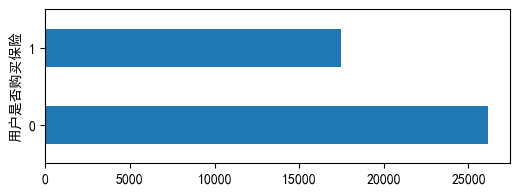

In [21]:
plt.figure(1,figsize=(6,2))
data0_4['用户是否购买保险'].value_counts().plot.barh()
plt.show()

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

(60.0, 90.0)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Density')

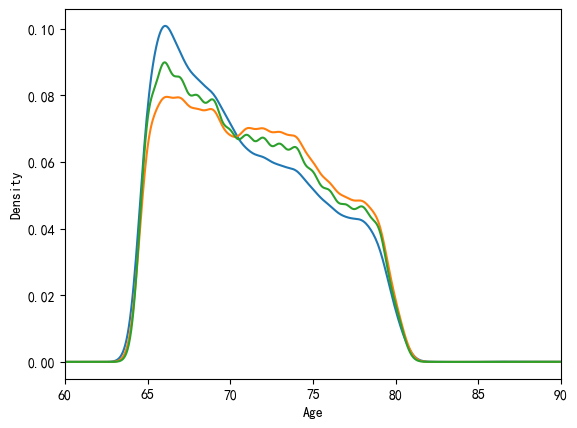

In [22]:
data0_4.年龄[data0_4.用户是否购买保险==1].plot(kind='density')
data0_4.年龄[data0_4.用户是否购买保险==0].plot(kind='density')
data0_4.年龄.dropna().plot(kind='density')
plt.xlim([60,90])
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## 探索家庭成员字段信息

In [23]:
#将5_22列取出来并进行翻译
data5_22 = chinese(data_01[feature_dict.变量名[5:23].tolist()])
data5_22.head()

,是否有小孩,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有家庭成员小于18岁,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,家里是否有老人
0,Y,4,0,5,1,1,5,3,8,N,N,N,Y,N,N,Y,Y,Y
1,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
2,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
3,Y,0,4,0,0,0,1,4,5,N,N,N,N,Y,Y,N,Y,Y
4,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N


In [24]:
fre(data5_22)

字段名: 是否有小孩
----------
字段数据类型: object
----------------------------
是否有小孩
U    24500
Y    10225
P     8941
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在0-2岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在0-2岁之间
0    40677
4     2856
1       57
2       48
3       16
6        9
5        3
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在3-5岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在3-5岁之间
0    41087
4     2068
1      204
2      202
3       45
5       30
6       29
7        1
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在6-10岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在6-10岁之间
0    38969
4     2960
1      553
2      528
6      240
5      209
3      176
7       31
Name: count, dtype: int64
-----------------

## 探索疾病相关字段

In [25]:
#将23_35列取出来并进行翻译
data23_35 = chinese(data_01[feature_dict.变量名[23:35].tolist()])
data23_35.head()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,N,N


In [26]:
fre(data23_35)

字段名: 是否有关节炎
----------
字段数据类型: object
----------------------------
是否有关节炎
N    38369
Y     5297
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有糖尿病
----------
字段数据类型: object
----------------------------
是否有糖尿病
N    40554
Y     3112
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有抑郁症
----------
字段数据类型: object
----------------------------
是否有抑郁症
N    41674
Y     1992
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有高血压
----------
字段数据类型: object
----------------------------
是否有高血压
N    38102
Y     5564
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 胆固醇含量是否过高
----------
字段数据类型: object
----------------------------
胆固醇含量是否过高
N    37395
Y     6271
Name: count, dtype: int64
------------------------

In [27]:
#0 1 转码
def zero_one(x):
    for i in x.columns:
        if x[i].dtype == 'object':
            dic = dict(zip(list(x[i].value_counts().index),range(x[i].nunique())))
            x[i] = x[i].map(dic)
    return x
dd = zero_one(data23_35)

In [28]:
zero_one(data23_35).corr()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
是否有关节炎,1.000000,0.446458,0.414955,0.632994,0.638905,0.478167,0.403263,0.669722,0.670945,0.356717,0.432069,0.570546
是否有糖尿病,0.446458,1.000000,0.306319,0.499331,0.485837,0.341276,0.360596,0.447038,0.453943,0.273800,0.283378,0.386641
是否有抑郁症,0.414955,0.306319,1.000000,0.393726,0.403696,0.379312,0.315257,0.411868,0.432201,0.275739,0.303972,0.346339
是否有高血压,0.632994,0.499331,0.393726,1.000000,0.719111,0.441706,0.436309,0.648784,0.651767,0.348651,0.397823,0.562810
胆固醇含量是否过高,0.638905,0.485837,0.403696,0.719111,1.000000,0.446039,0.426180,0.681824,0.690814,0.353627,0.413284,0.633716
是否有呼吸疾病,0.478167,0.341276,0.379312,0.441706,0.446039,1.000000,0.315187,0.497713,0.483421,0.282426,0.336810,0.414359
是否有心脏病,0.403263,0.360596,0.315257,0.436309,0.426180,0.315187,1.000000,0.372830,0.381817,0.348280,0.208320,0.269672
是否有过敏性鼻炎,0.669722,0.447038,0.411868,0.648784,0.681824,0.497713,0.372830,1.000000,0.732883,0.357085,0.484138,0.640638
是否有消化不良,0.670945,0.453943,0.432201,0.651767,0.690814,0.483421,0.381817,0.732883,1.000000,0.355564,0.450049,0.639802
是否耳聋,0.356717,0.273800,0.275739,0.348651,0.353627,0.282426,0.348280,0.357085,0.355564,1.000000,0.219128,0.274512


([<matplotlib.axis.XTick at 0x16c18215a90>,
 [Text(0, 0, '是否有关节炎'),
  Text(1, 0, '是否有糖尿病'),
  Text(2, 0, '是否有抑郁症'),
  Text(3, 0, '是否有高血压'),
  Text(4, 0, '胆固醇含量是否过高'),
  Text(5, 0, '是否有呼吸疾病'),
  Text(6, 0, '是否有心脏病'),
  Text(7, 0, '是否有过敏性鼻炎'),
  Text(8, 0, '是否有消化不良'),
  Text(9, 0, '是否耳聋'),
  Text(10, 0, '是否有皮肤病'),
  Text(11, 0, '是否视力不好')])

([<matplotlib.axis.YTick at 0x16c181f8d90>,
 [Text(0, 0, '是否有关节炎'),
  Text(0, 1, '是否有糖尿病'),
  Text(0, 2, '是否有抑郁症'),
  Text(0, 3, '是否有高血压'),
  Text(0, 4, '胆固醇含量是否过高'),
  Text(0, 5, '是否有呼吸疾病'),
  Text(0, 6, '是否有心脏病'),
  Text(0, 7, '是否有过敏性鼻炎'),
  Text(0, 8, '是否有消化不良'),
  Text(0, 9, '是否耳聋'),
  Text(0, 10, '是否有皮肤病'),
  Text(0, 11, '是否视力不好')])

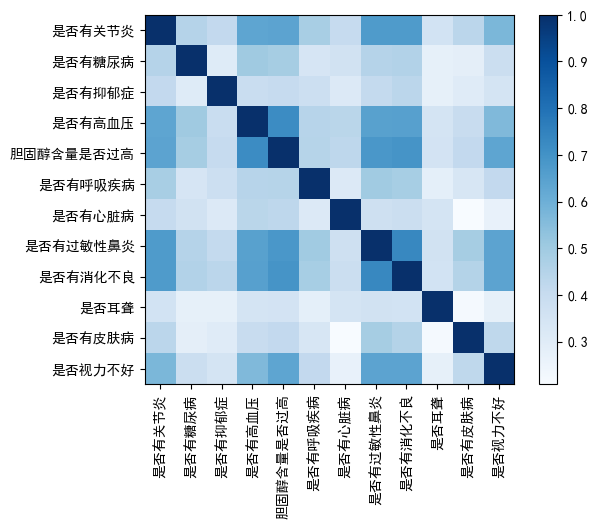

In [29]:
# zero_one(data23_35).corr().plot.heatmap()

corr_df = zero_one(data23_35).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # 颜色选择 https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

### 自定义函数筛选相关性高于某个值的字段

筛选相关性高于0.65的字段

In [30]:
def higt_cor(x,y=0.65):
    data_cor = (x.corr()>y)
    print(data_cor)
    a=[]
    for i in data_cor.columns:
        if data_cor[i].sum()>=2:
            a.append([i,x.corr()[i].mean()])

    return a  #这些是我们要考虑删除的

In [31]:
higt_cor(data23_35)

           是否有关节炎  是否有糖尿病  是否有抑郁症  是否有高血压  胆固醇含量是否过高  是否有呼吸疾病  是否有心脏病  \
是否有关节炎       True   False   False   False      False    False   False   
是否有糖尿病      False    True   False   False      False    False   False   
是否有抑郁症      False   False    True   False      False    False   False   
是否有高血压      False   False   False    True       True    False   False   
胆固醇含量是否过高   False   False   False    True       True    False   False   
是否有呼吸疾病     False   False   False   False      False     True   False   
是否有心脏病      False   False   False   False      False    False    True   
是否有过敏性鼻炎     True   False   False   False       True    False   False   
是否有消化不良      True   False   False    True       True    False   False   
是否耳聋        False   False   False   False      False    False   False   
是否有皮肤病      False   False   False   False      False    False   False   
是否视力不好      False   False   False   False      False    False   False   

           是否有过敏性鼻炎  是否有消化不良   是否耳聋  是否有皮肤病  是否视力不

[['是否有关节炎', 0.5595619028171447],
 ['是否有高血压', 0.5610843063734482],
 ['胆固醇含量是否过高', 0.5744195831370256],
 ['是否有过敏性鼻炎', 0.5787102443420652],
 ['是否有消化不良', 0.5786005226486616]]

## 探索投资相关字段

In [32]:
#将35_41列取出来并进行翻译
data35_41 = chinese(data_01[feature_dict.变量名[35:41].tolist()])
data35_41.head()

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
0,N,N,N,N,N,N
1,N,N,N,N,N,N
2,N,N,N,N,N,N
3,Y,N,N,N,N,N
4,N,Y,N,N,N,N


In [33]:
fre(data35_41)

字段名: 是否有过破产记录
----------
字段数据类型: object
----------------------------
是否有过破产记录
N    40599
Y     3067
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否大学毕业
----------
字段数据类型: object
----------------------------
是否大学毕业
N    39236
Y     4422
Name: count, dtype: int64
----------------------------
缺失值的个数: 8
------------------------------------------------


字段名: 是否用过保险服务
----------
字段数据类型: object
----------------------------
是否用过保险服务
N    42793
Y      873
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否投资过寿险
----------
字段数据类型: object
----------------------------
是否投资过寿险
N    35871
Y     7795
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否购买过医疗险
----------
字段数据类型: object
----------------------------
是否购买过医疗险
N    40016
Y     3650
Name: count, dtype: int64
----------------

([<matplotlib.axis.XTick at 0x16c1833b5b0>,
 [Text(0, 0, '是否有过破产记录'),
  Text(1, 0, '是否大学毕业'),
  Text(2, 0, '是否用过保险服务'),
  Text(3, 0, '是否投资过寿险'),
  Text(4, 0, '是否购买过医疗险'),
  Text(5, 0, '是否有投资')])

([<matplotlib.axis.YTick at 0x16c183432b0>,
 [Text(0, 0, '是否有过破产记录'),
  Text(0, 1, '是否大学毕业'),
  Text(0, 2, '是否用过保险服务'),
  Text(0, 3, '是否投资过寿险'),
  Text(0, 4, '是否购买过医疗险'),
  Text(0, 5, '是否有投资')])

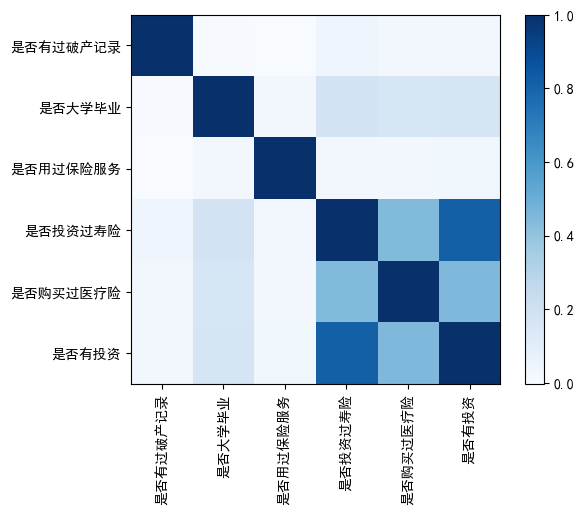

In [34]:
corr_df = zero_one(data35_41).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # 颜色选择 https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [35]:
higt_cor(data35_41)

          是否有过破产记录  是否大学毕业  是否用过保险服务  是否投资过寿险  是否购买过医疗险  是否有投资
是否有过破产记录      True   False     False    False     False  False
是否大学毕业       False    True     False    False     False  False
是否用过保险服务     False   False      True    False     False  False
是否投资过寿险      False   False     False     True     False   True
是否购买过医疗险     False   False     False    False      True  False
是否有投资        False   False     False     True     False   True


[['是否投资过寿险', 0.41622919058623675], ['是否有投资', 0.4137703083616686]]

## 探索生活习惯

In [36]:
#将41_51列取出来并进行翻译
data41_51 = chinese(data_01[feature_dict.变量名[41:51].tolist()])
data41_51.head()

,是否网上购买过产品,是否通过快递买过东西,所处的县的大小,是否上网,是否喜欢美术,是否经常有奢侈消费,是否经常户外活动,是否喜欢运动,是否热爱科技,幸福指数
0,N,S,A,Y,N,N,N,N,N,1.0
1,N,P,A,N,N,N,N,N,N,4.0
2,N,M,A,Y,N,N,N,N,N,3.0
3,N,S,B,Y,N,N,N,N,N,1.0
4,Y,M,B,Y,Y,Y,N,Y,Y,3.0


In [37]:
fre(data41_51)

字段名: 是否网上购买过产品
----------
字段数据类型: object
----------------------------
是否网上购买过产品
N    36197
Y     7469
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否通过快递买过东西
----------
字段数据类型: object
----------------------------
是否通过快递买过东西
M    27450
S     9947
U     3912
P     2350
Name: count, dtype: int64
----------------------------
缺失值的个数: 7
------------------------------------------------


字段名: 所处的县的大小
----------
字段数据类型: object
----------------------------
所处的县的大小
A    26539
B    12687
C     3823
D      607
Name: count, dtype: int64
----------------------------
缺失值的个数: 10
------------------------------------------------


字段名: 是否上网
----------
字段数据类型: object
----------------------------
是否上网
Y    28473
N    15193
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否喜欢美术
----------
字段数据类型: object
----------------------------
是否喜欢美术
N    37029
Y     6637

<Axes: xlabel='N2NCY'>

Text(0.5, 0, '县的大小')

Text(0, 0.5, '购买数量')

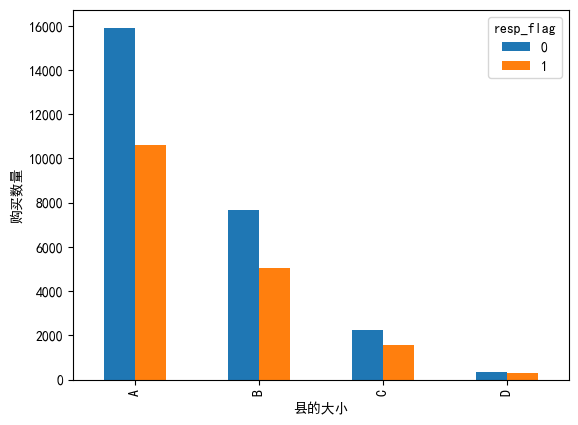

In [38]:
# 根据 x 和 hue 列绘制 countplot
data_01.groupby(['N2NCY', 'resp_flag']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('县的大小')
plt.ylabel('购买数量')

## 探索家庭收入

In [39]:
#将51_59列取出来并进行翻译
data51_59 = chinese(data_01[feature_dict.变量名[51:59].tolist()])
data51_59.head()

,是否有房子,是否有医保补贴,收入所处排名,普查家庭有效购买收入,家庭收入,家庭房屋价值,社会经济地位评分,家庭自成立日起的时间
0,Y,C,74.0,71,90.0,738.0,111,64.0
1,Y,U,69.0,69,84.0,494.0,97,56.0
2,Y,U,32.0,44,50.0,516.0,83,50.0
3,Y,C,82.0,82,103.0,473.0,105,52.0
4,U,A,38.0,47,55.0,523.0,89,50.0


In [40]:
fre(data51_59)

字段名: 是否有房子
----------
字段数据类型: object
----------------------------
是否有房子
Y    31478
U     4747
P     4604
R     2623
T      204
Name: count, dtype: int64
----------------------------
缺失值的个数: 10
------------------------------------------------


字段名: 是否有医保补贴
----------
字段数据类型: object
----------------------------
是否有医保补贴
U    21612
C     8972
A     6765
B     6306
Name: count, dtype: int64
----------------------------
缺失值的个数: 11
------------------------------------------------


字段名: 收入所处排名
----------
字段数据类型: float64
----------------------------
收入所处排名
79.0    713
61.0    648
55.0    647
82.0    636
88.0    607
       ... 
25.0    258
46.0    254
17.0    246
23.0    225
42.0    162
Name: count, Length: 99, dtype: int64
----------------------------
缺失值的个数: 2
------------------------------------------------


字段名: 普查家庭有效购买收入
----------
字段数据类型: int64
----------------------------
普查家庭有效购买收入
48     1034
45      994
44      980
47      967
49      957
       ... 
243       1
230       1
178    

([<matplotlib.axis.XTick at 0x16c188bcfd0>,
 [Text(0, 0, '是否有房子'),
  Text(1, 0, '是否有医保补贴'),
  Text(2, 0, '收入所处排名'),
  Text(3, 0, '普查家庭有效购买收入'),
  Text(4, 0, '家庭收入'),
  Text(5, 0, '家庭房屋价值'),
  Text(6, 0, '社会经济地位评分'),
  Text(7, 0, '家庭自成立日起的时间')])

([<matplotlib.axis.YTick at 0x16c18612cd0>,
 [Text(0, 0, '是否有房子'),
  Text(0, 1, '是否有医保补贴'),
  Text(0, 2, '收入所处排名'),
  Text(0, 3, '普查家庭有效购买收入'),
  Text(0, 4, '家庭收入'),
  Text(0, 5, '家庭房屋价值'),
  Text(0, 6, '社会经济地位评分'),
  Text(0, 7, '家庭自成立日起的时间')])

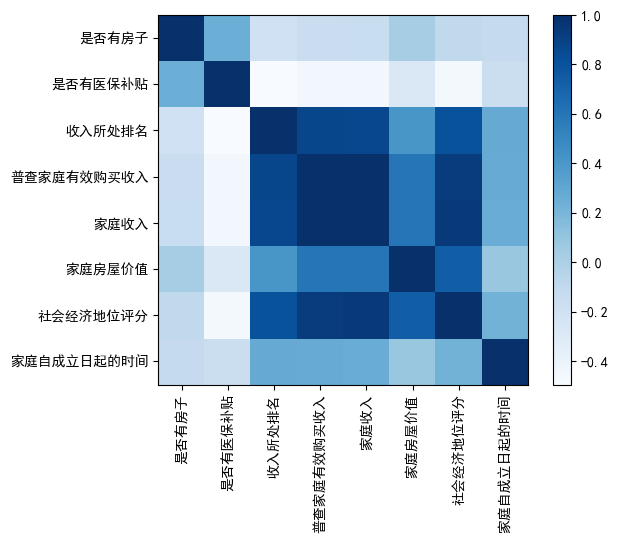

In [41]:
corr_df = zero_one(data51_59).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # 颜色选择 https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [42]:
higt_cor(data51_59)

            是否有房子  是否有医保补贴  收入所处排名  普查家庭有效购买收入   家庭收入  家庭房屋价值  社会经济地位评分  \
是否有房子        True    False   False       False  False   False     False   
是否有医保补贴     False     True   False       False  False   False     False   
收入所处排名      False    False    True        True   True   False      True   
普查家庭有效购买收入  False    False    True        True   True   False      True   
家庭收入        False    False    True        True   True   False      True   
家庭房屋价值      False    False   False       False  False    True      True   
社会经济地位评分    False    False    True        True   True    True      True   
家庭自成立日起的时间  False    False   False       False  False   False     False   

            家庭自成立日起的时间  
是否有房子            False  
是否有医保补贴          False  
收入所处排名           False  
普查家庭有效购买收入       False  
家庭收入             False  
家庭房屋价值           False  
社会经济地位评分         False  
家庭自成立日起的时间        True  


[['收入所处排名', 0.43989325923341027],
 ['普查家庭有效购买收入', 0.5044655598679655],
 ['家庭收入', 0.5062826976735524],
 ['家庭房屋价值', 0.39619380570335583],
 ['社会经济地位评分', 0.5077671562993784]]

## 探索所处地区情况

In [43]:
#将59列之后取出来并进行翻译
data59 = chinese(data_01[feature_dict.变量名[59:].tolist()])
data59.head()

,所处的省份,贫穷以上人的比例,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,所处地区移动房屋的比例,离婚或者分居人群所占比例,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,该客户被多少个名单包含,所在地区处方药计划覆盖的比例,所处地区的家庭收入排名
0,CA,99,11.0,10,1,0,14,52,65,71.0,22,79.0,15.0,8,42,8
1,CA,98,6.0,15,2,0,15,44,81,99.0,37,65.0,17.0,6,46,3
2,CA,88,NaN,26,12,0,17,38,44,62.0,44,47.0,20.0,7,46,3
3,CA,96,NaN,15,4,0,14,45,71,99.0,39,71.0,4.0,8,37,9
4,CA,88,NaN,9,12,10,29,32,13,36.0,15,65.0,9.0,4,37,3


In [44]:
fre(data59)

字段名: 所处的省份
----------
字段数据类型: object
----------------------------
所处的省份
CA    11700
OH     8959
NY     6481
IN     4954
CT     2873
MO     2202
WI     1884
GA     1687
KY     1375
NH      904
ME      647
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 贫穷以上人的比例
----------
字段数据类型: int64
----------------------------
贫穷以上人的比例
99    4081
98    3624
97    3440
96    3307
95    2885
      ... 
7        1
25       1
35       1
17       1
22       1
Name: count, Length: 81, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 所处地区有多少居住小区在2000年及以后建立
----------
字段数据类型: float64
----------------------------
所处地区有多少居住小区在2000年及以后建立
4.0     2467
2.0     2401
3.0     2364
5.0     2317
1.0     2305
        ... 
99.0       5
95.0       4
90.0       4
86.0       3
94.0       2
Name: count, Length: 100, dtype: int64
----------------------------
缺失值的个数: 5
--------------------------

<Axes: xlabel='STATE_NAME'>

Text(0.5, 0, '所处的省份')

Text(0, 0.5, '购买数量')

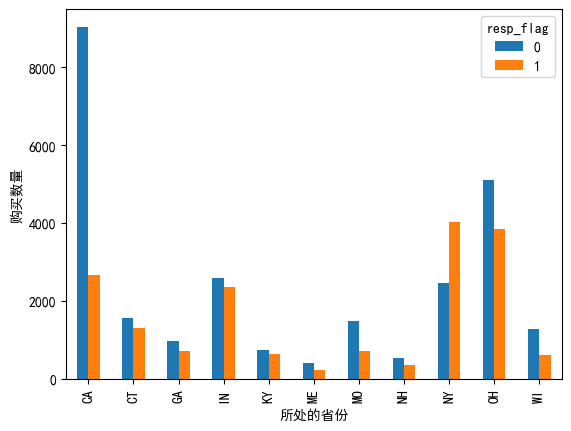

In [45]:
data_01.groupby(['STATE_NAME', 'resp_flag']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('所处的省份')
plt.ylabel('购买数量')

([<matplotlib.axis.XTick at 0x16c18929250>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(1, 0, '所处地区蓝领所占百分比'),
  Text(2, 0, '贫穷以下人的比例'),
  Text(3, 0, '所处地区移动房屋的比例'),
  Text(4, 0, '白领所占比例'),
  Text(5, 0, '所处地区的家庭收入排名')])

([<matplotlib.axis.YTick at 0x16c18929f10>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(0, 1, '所处地区蓝领所占百分比'),
  Text(0, 2, '贫穷以下人的比例'),
  Text(0, 3, '所处地区移动房屋的比例'),
  Text(0, 4, '白领所占比例'),
  Text(0, 5, '所处地区的家庭收入排名')])

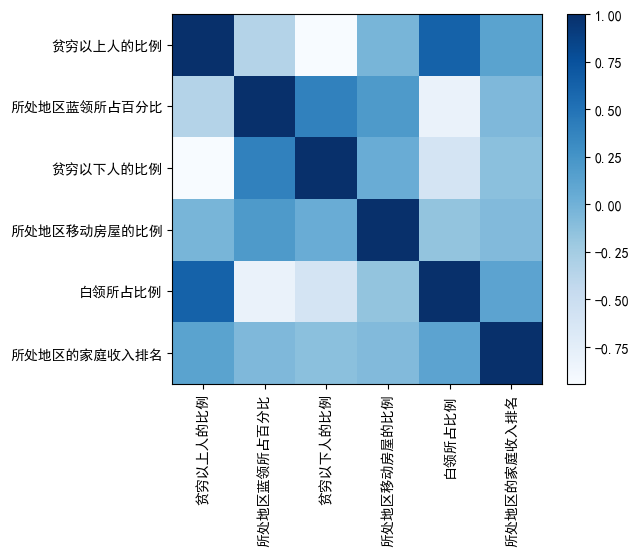

In [46]:
a = chinese(data_01[["c210apvt","c210blu","c210bpvt","c210mob","c210wht","zhip19"]])
corr_df = a.corr()
plt.imshow(corr_df, 
           cmap='Blues',    # 颜色选择 https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [47]:
print(data59.columns)
del data59["所处的省份"]
higt_cor(data59)

Index(['所处的省份', '贫穷以上人的比例', '所处地区有多少居住小区在2000年及以后建立', '所处地区蓝领所占百分比',
       '贫穷以下人的比例', '所处地区移动房屋的比例', '离婚或者分居人群所占比例', '已婚人群所占比例', '有房子人所占比例',
       '独宅住户所占比例', '有小孩的家庭所占比例', '白领所占比例', '所处地区居住年限', '该客户被多少个名单包含',
       '所在地区处方药计划覆盖的比例', '所处地区的家庭收入排名'],
      dtype='object')
                        贫穷以上人的比例  所处地区有多少居住小区在2000年及以后建立  所处地区蓝领所占百分比  \
贫穷以上人的比例                    True                   False        False   
所处地区有多少居住小区在2000年及以后建立     False                    True        False   
所处地区蓝领所占百分比                False                   False         True   
贫穷以下人的比例                   False                   False        False   
所处地区移动房屋的比例                False                   False        False   
离婚或者分居人群所占比例               False                   False        False   
已婚人群所占比例                    True                   False        False   
有房子人所占比例                   False                   False        False   
独宅住户所占比例                   False                   False        Fal

[['贫穷以上人的比例', 0.12125523387829151],
 ['已婚人群所占比例', 0.1873688047444779],
 ['有房子人所占比例', 0.2209970966891868],
 ['独宅住户所占比例', 0.20956765890110102]]

([<matplotlib.axis.XTick at 0x16c1966c070>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(1, 0, '所处地区有多少居住小区在2000年及以后建立'),
  Text(2, 0, '所处地区蓝领所占百分比'),
  Text(3, 0, '贫穷以下人的比例'),
  Text(4, 0, '所处地区移动房屋的比例'),
  Text(5, 0, '离婚或者分居人群所占比例'),
  Text(6, 0, '已婚人群所占比例'),
  Text(7, 0, '有房子人所占比例'),
  Text(8, 0, '独宅住户所占比例'),
  Text(9, 0, '有小孩的家庭所占比例'),
  Text(10, 0, '白领所占比例'),
  Text(11, 0, '所处地区居住年限'),
  Text(12, 0, '该客户被多少个名单包含'),
  Text(13, 0, '所在地区处方药计划覆盖的比例'),
  Text(14, 0, '所处地区的家庭收入排名')])

([<matplotlib.axis.YTick at 0x16c1966cd30>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(0, 1, '所处地区有多少居住小区在2000年及以后建立'),
  Text(0, 2, '所处地区蓝领所占百分比'),
  Text(0, 3, '贫穷以下人的比例'),
  Text(0, 4, '所处地区移动房屋的比例'),
  Text(0, 5, '离婚或者分居人群所占比例'),
  Text(0, 6, '已婚人群所占比例'),
  Text(0, 7, '有房子人所占比例'),
  Text(0, 8, '独宅住户所占比例'),
  Text(0, 9, '有小孩的家庭所占比例'),
  Text(0, 10, '白领所占比例'),
  Text(0, 11, '所处地区居住年限'),
  Text(0, 12, '该客户被多少个名单包含'),
  Text(0, 13, '所在地区处方药计划覆盖的比例'),
  Text(0, 14, '所处地区的家庭收入排名')])

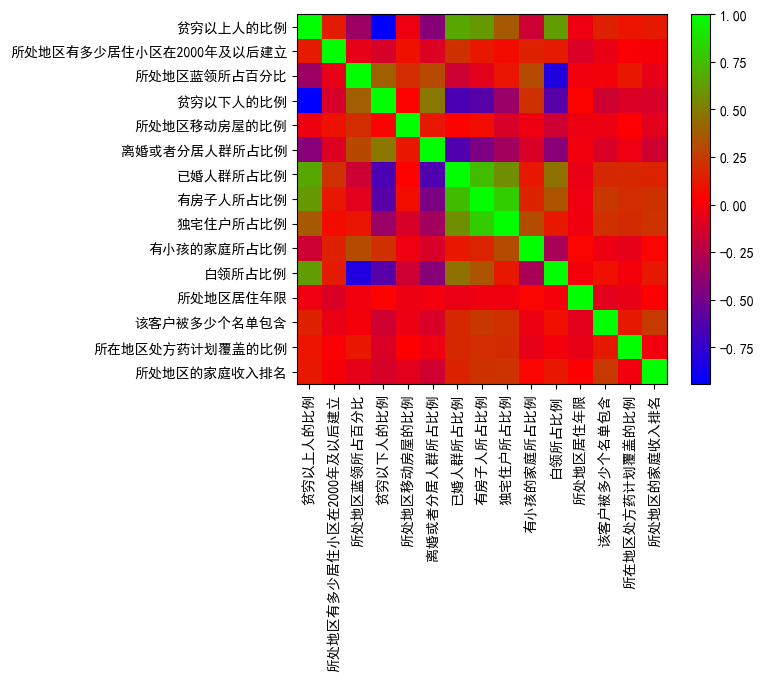

In [48]:
corr_df = data59.corr()
plt.imshow(corr_df, 
           cmap='brg',    # 颜色选择 https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

# 数据清洗

In [49]:
data_02 = data_01.copy()
data_02.shape

(43666, 76)

## 删除特征

In [50]:
del_col = ["KBM_INDV_ID","U18","POEP","AART","AHCH","AASN","COLLEGE",
 "INVE","c210cip","c210hmi","c210hva","c210kses","c210blu","c210bpvt","c210poo","KBM_INDV_ID","meda"]


In [51]:
data_02 = data_02.drop(columns=del_col)

In [52]:
data_02.shape

(43666, 60)

## 删除重复值

In [53]:
data_02.drop_duplicates().shape

(43666, 60)

## 划分训练集与测试集

一定要先划分数据集再填充、转码

In [54]:
from sklearn.model_selection import train_test_split

y = data_02.pop('resp_flag') #标签
X = data_02  #特征

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=100)

In [55]:
Xtrain_01=Xtrain.copy()
Xtest_01=Xtest.copy()
Ytrain_01=Ytrain.copy()
Ytest_01=Ytest.copy()

## 填充缺失值

### 填充中位数

In [56]:
fil = ["age","c210mah","c210b200","c210psu","c210wht","ilor"]

Xtrain_01[fil].median()

age         71.0
c210mah     53.0
c210b200    10.0
c210psu     77.0
c210wht     61.0
ilor        15.0
dtype: float64

In [57]:
dic = dict(zip(Xtrain_01[fil].median().index,Xtrain_01[fil].median()))
dic

{'age': 71.0,
 'c210mah': 53.0,
 'c210b200': 10.0,
 'c210psu': 77.0,
 'c210wht': 61.0,
 'ilor': 15.0}

In [58]:
#向训练集填充中位数
Xtrain_01 = Xtrain_01.fillna(dic) 

### 填充众数

In [59]:
mod = ["N1819","ASKN","MOBPLUS","N2NCY","LIVEWELL","HOMSTAT","HINSUB"]

dic_mod = dict(zip(Xtrain_01[mod].mode().columns,Xtrain_01[mod].iloc[0,:]))

Xtrain_01 = Xtrain_01.fillna(dic_mod) 

### 替换填充

In [60]:
Xtrain_01['N6064'] = Xtrain_01['N6064'].replace('0','N')  #0  替换成  N

In [61]:
Xtrain_01.isnull().sum()[Xtrain_01.isnull().sum()!=0]

Series([], dtype: int64)

### 对测试集进行填充(总结)

In [62]:
# 需要填的字段
fil = ["age","c210mah","c210b200","c210psu","c210wht","ilor"]

#填充中位数--测试集

dic = dict(zip(Xtest_01[fil].median().index,Xtest_01[fil].median()))

Xtest_01 = Xtest_01.fillna(dic) 

# #填充众数--测试集
mod = ["N1819","ASKN","MOBPLUS","N2NCY","LIVEWELL","HOMSTAT","HINSUB"]

dic_mod = dict(zip(Xtest_01[mod].mode().columns,Xtest_01[mod].iloc[0,:]))

Xtest_01 = Xtest_01.fillna(dic_mod) 

# #替换填充
Xtest_01['N6064'] = Xtest_01['N6064'].replace('0','N') 

Xtest_01.isnull().sum()[Xtest_01.isnull().sum() !=0]


Series([], dtype: int64)

# 转码

In [63]:
encod_col = pd.read_excel('保险案例数据字典_清洗.xlsx')
encod_col = encod_col[encod_col["转"].notna()][["变量名","转"]]
encod_col.head()

,变量名,转
3,GEND,0-1
4,c210mys,哑变量
5,POC19,哑变量
15,N1819,0-1
16,N2029,0-1


In [64]:
# 查看Xtrain_01中object类型
object_tr =Xtrain_01.describe(include='O').columns
object_tr

Index(['GEND', 'ADBT', 'ADEP', 'AHBP', 'ARES', 'AHRT', 'ADGS', 'AHRL', 'ASKN',
       'AVIS', 'BANK', 'FINI', 'INLI', 'INMEDI', 'IOLP', 'MOBPLUS', 'N2NCY',
       'N1819', 'N2029', 'N3039', 'N4049', 'N5059', 'N6064', 'N65P', 'ONLA',
       'SGFA', 'SGLL', 'SGOE', 'SGSE', 'SGTC', 'POC19', 'HOMSTAT', 'HINSUB',
       'STATE_NAME'],
      dtype='object')

In [65]:
#检查一下转码的目标是否出现
np.setdiff1d(object_tr,encod_col['变量名'])

array([], dtype=object)

## 0-1转码

In [66]:
# 获取0-1 转码的变量名
z_0_list = list(encod_col[encod_col['转']=='0-1'].变量名)
for i in del_col:
    if i in z_0_list:
        z_0_list.remove(i)
z_0_list

['GEND',
 'N1819',
 'N2029',
 'N3039',
 'N4049',
 'N5059',
 'N6064',
 'N65P',
 'ADBT',
 'ADEP',
 'AHBP',
 'ARES',
 'AHRT',
 'ADGS',
 'AHRL',
 'ASKN',
 'AVIS',
 'BANK',
 'FINI',
 'INLI',
 'INMEDI',
 'IOLP',
 'ONLA',
 'SGFA',
 'SGLL',
 'SGOE',
 'SGSE',
 'SGTC']

In [67]:
Xtrain_02 = Xtrain_01[z_0_list]
Xtrain_02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,M,N,N,Y,Y,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
22763,F,N,N,N,N,N,Y,Y,N,N,...,N,N,N,Y,Y,Y,N,N,Y,Y
40488,F,N,N,N,N,Y,N,Y,N,N,...,N,Y,Y,Y,Y,Y,Y,Y,Y,Y
22585,F,N,N,N,N,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
12204,M,N,N,Y,N,Y,N,Y,N,N,...,N,N,N,N,Y,N,Y,N,Y,Y


In [68]:
#sklearn的预处理模块
from sklearn.preprocessing import OrdinalEncoder

#fit_transform 直接转
new_arr = OrdinalEncoder().fit_transform(Xtrain_02)
new_arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [69]:
# columns 设置表头为原来的   index 索引也是原来
Xtrain_02 = pd.DataFrame(data=new_arr,columns=Xtrain_02.columns,index=Xtrain_02.index)
Xtrain_02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
40488,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12204,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


将转好的Xtrain_02  0-1编码变量  替换掉Xtrain_01

In [70]:
Xtrain_01[z_0_list] = Xtrain_02

In [71]:
Xtrain_01.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,4,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,4,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,6,17,61,99.0,34,83.0,16.0,70,13,7


## 哑变量转码

pandas-dummies 
one-hot

In [72]:
#获取哑变量---转码的变量名

o_h_list = encod_col[encod_col['转']=='哑变量'].变量名
o_h_list

4        c210mys
5          POC19
42       MOBPLUS
43         N2NCY
50      LIVEWELL
51       HOMSTAT
52        HINSUB
59    STATE_NAME
Name: 变量名, dtype: object

In [73]:
Xtrain_01[o_h_list].head()

,c210mys,POC19,MOBPLUS,N2NCY,LIVEWELL,HOMSTAT,HINSUB,STATE_NAME
18001,4,P,M,A,4.0,Y,U,OH
22763,4,P,M,B,4.0,R,A,IN
40488,4,P,M,A,1.0,Y,U,NH
22585,3,U,M,C,2.0,Y,A,ME
12204,6,Y,M,B,1.0,Y,U,KY


In [74]:
o_h_01 = ['c210mys','LIVEWELL'] #非字符型的变量
o_h_02 = [i for i in o_h_list if i not in o_h_01] #字符类型的变量

#先转o_h_02
Xtrain_02 = Xtrain_01.copy()
chinese(Xtrain_02[o_h_02]).head()


,POC19,MOBPLUS,N2NCY,HOMSTAT,HINSUB,STATE_NAME
18001,P,M,A,Y,U,OH
22763,P,M,B,R,A,IN
40488,P,M,A,Y,U,NH
22585,U,M,C,Y,A,ME
12204,Y,M,B,Y,U,KY


In [75]:
Xtrain_02 = pd.get_dummies(chinese(Xtrain_02[o_h_02]))
Xtrain_02.head()

,POC19_P,POC19_U,POC19_Y,MOBPLUS_M,MOBPLUS_P,MOBPLUS_S,MOBPLUS_U,N2NCY_A,N2NCY_B,N2NCY_C,...,STATE_NAME_CT,STATE_NAME_GA,STATE_NAME_IN,STATE_NAME_KY,STATE_NAME_ME,STATE_NAME_MO,STATE_NAME_NH,STATE_NAME_NY,STATE_NAME_OH,STATE_NAME_WI
18001,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
22763,True,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
40488,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
22585,False,True,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
12204,False,False,True,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [76]:
#w我们再转 o_h_01
Xtrain_03 = Xtrain_01.copy()

#转成字符类型
Xtrain_03 = Xtrain_03[o_h_01].astype(str)
#转化覆盖
Xtrain_03 = pd.get_dummies(chinese(Xtrain_03[o_h_01]))

Xtrain_03.head()

,c210mys_0,c210mys_1,c210mys_2,c210mys_3,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
18001,False,False,False,False,True,False,False,False,False,False,False,False,True,False
22763,False,False,False,False,True,False,False,False,False,False,False,False,True,False
40488,False,False,False,False,True,False,False,False,False,True,False,False,False,False
22585,False,False,False,True,False,False,False,False,False,False,True,False,False,False
12204,False,False,False,False,False,False,True,False,False,True,False,False,False,False


Xtrain_02 Xtrain_03 是转好的     先删除原转码的字段再将转好的插入到数据集中

In [77]:
# Xtrain_04 删除原转码的字段
Xtrain_04 = Xtrain_01.copy() 
Xtrain_04 = chinese(Xtrain_04.drop(columns=o_h_01+o_h_02))
Xtrain_04.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mob,c210pdv,c210pmr,78.0,c210pwc,61.0,14.0,pdpe,tins,zhip19
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,0,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,12,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,0,17,61,99.0,34,83.0,16.0,70,13,7


In [78]:
Xtrain_04.shape

(30566, 51)

In [79]:
Xtrain_02.shape #字符的哑变量

(30566, 31)

In [80]:
Xtrain_03.shape #非字符的哑变量

(30566, 14)

In [81]:
#将 Xtrain_04  Xtrain_02 Xtrain_03 合并
Xtrain_05 = pd.concat([Xtrain_04,Xtrain_02,Xtrain_03],axis=1)
Xtrain_05.shape

(30566, 96)

In [82]:
Xtrain_05.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,True,False,False,False,False,False,False,False,True,False
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False


## 对测试集进行转码(总结)

0-1 转码总结

In [83]:
#获取需要转码的字段
encod_col = pd.read_excel('保险案例数据字典_清洗.xlsx')
encod_col = encod_col[encod_col["转"].notna()][["变量名","转"]]
# 查看Xtest_01中object类型
object_tr =Xtest_01.describe(include='O').columns

#检查一下转码的目标是否出现
np.setdiff1d(object_tr,encod_col['变量名'])

#0-1 转码
# 获取0-1 转码的变量名
z_0_list = list(encod_col[encod_col['转']=='0-1'].变量名)
for i in del_col:
    if i in z_0_list:
        z_0_list.remove(i)
Xtest_02 = Xtest_01[z_0_list]

#sklearn的预处理模块
from sklearn.preprocessing import OrdinalEncoder

#fit_transform 直接转
new_arr = OrdinalEncoder().fit_transform(Xtest_02)
# columns 设置表头为原来的   index 索引也是原来
Xtest_02 = pd.DataFrame(data=new_arr,columns=Xtest_02.columns,index=Xtest_02.index)

Xtest_01[z_0_list] = Xtest_02

Xtest_01.head()

array([], dtype=object)

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,16,28,22.0,40,49.0,22.0,47,5,0
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,6,6,69,88.0,44,84.0,16.0,63,9,5
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,12,64,81.0,40,52.0,8.0,87,7,0
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,17,51,85.0,30,79.0,15.0,62,11,3
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,5,17,40,59.0,15,75.0,13.0,61,13,8


哑变量 总结

In [84]:
#获取哑变量转码的变量
o_h_list = encod_col[encod_col['转']=='哑变量'].变量名

o_h_01 = ['c210mys','LIVEWELL'] #非字符型的变量
o_h_02 = [i for i in o_h_list if i not in o_h_01] #字符类型的变量

#先转o_h_02 字符类型
Xtest_02 = Xtest_01.copy()
Xtest_02 = pd.get_dummies(chinese(Xtest_02[o_h_02]))

#w我们再转 o_h_01  非字符
Xtest_03 = Xtest_01.copy()
#转成字符类型
Xtest_03 = Xtest_03[o_h_01].astype(str)
#转化覆盖
Xtest_03 = pd.get_dummies(chinese(Xtest_03[o_h_01]))


# Xtrain_04 删除原转码的字段
Xtest_04 = Xtest_01.copy() 
Xtest_04 = chinese(Xtest_04.drop(columns=o_h_01+o_h_02))


#将 Xtest_04  Xtest_02 Xtest_03 合并
Xtest_05 = pd.concat([Xtest_04,Xtest_02,Xtest_03],axis=1)
Xtest_05.shape

(13100, 96)

In [85]:
Xtest_05.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False


# 初步建模

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=420,class_weight='balanced')
cvs = cross_val_score(clf,Xtrain_05,Ytrain)

In [87]:
cvs.mean()

0.5993914576104883

## 网格搜索找最优参数

In [88]:
from sklearn.model_selection import GridSearchCV

#测试参数
param_test = {
             'splitter':('best','random'),
             'criterion':('gini','entropy'), #基尼  信息熵
             'max_depth':range(3,15) #最大深度
             #,min_samples_leaf:(1,50,5)
}

gsearch= GridSearchCV(estimator=clf, #对应模型
                param_grid=param_test,#要找最优的参数
                scoring='roc_auc',#准确度评估标准 
                n_jobs=-1,# 并行数  个数   -1:跟CPU核数一致
                cv = 5,#交叉验证 5折
                verbose=2#输出训练过程
                )

gsearch.fit(Xtrain_05,Ytrain_01)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=420),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(3, 15),
                         'splitter': ('best', 'random')},
             scoring='roc_auc', verbose=2)

In [89]:
#优化期间观察到的最高评分
gsearch.best_score_

0.691856415170639

In [90]:
gsearch.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

# 模型评估

In [91]:
from sklearn.metrics import accuracy_score #准确率
from sklearn.metrics import precision_score #精准率
from sklearn.metrics import recall_score #召回率
from sklearn.metrics import roc_curve

In [92]:
y_pre = gsearch.predict(Xtest_05)

In [93]:
accuracy_score(y_pre,Ytest) 

0.6090076335877863

In [94]:
precision_score(y_pre,Ytest)

0.748152359295054

In [95]:
recall_score(y_pre,Ytest)

0.5100116264048572

In [96]:
fpr,tpr,thresholds = roc_curve(y_pre,Ytest) #roc参数

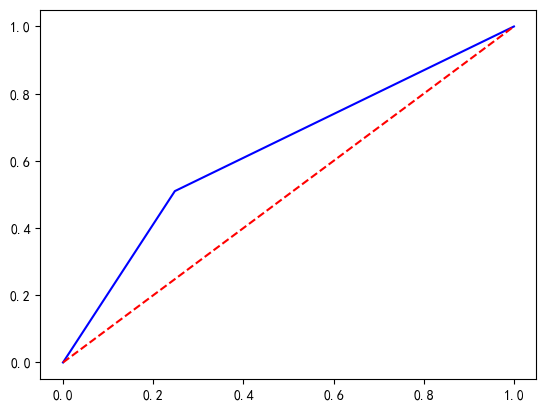

In [97]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,c='b',label='roc曲线')
plt.plot(fpr,fpr,c='r',ls='--')

# 输出规则

In [98]:
#最优参数
#{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from pydotplus.graphviz import graph_from_dot_data
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


#将最优参数放到分类器
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter='best')
clf = clf.fit(Xtrain_05,Ytrain)


features = Xtrain_05.columns
dot_data = tree.export_graphviz(clf,
                     feature_names=features,
                     class_names=['Not Buy','Buy'],
                     filled=True,
                     rounded=True,
                     leaves_parallel=False)

graph= graph_from_dot_data(dot_data.replace('helvetica', '"Microsoft YaHei"'))
graph.write_png('决策树.png')
graph

True